# matrix multiplication

Dataset length: 10000
Images shape: (10000, 28, 28)
Labels shape: (10000,)


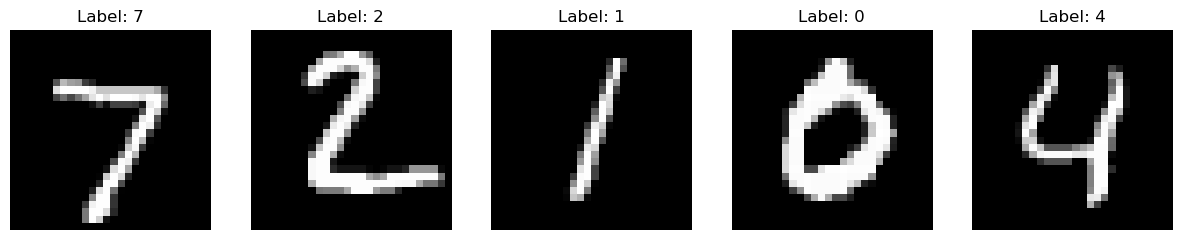

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

# Download and load the MNIST dataset
mnist = datasets.MNIST(root="./data", train=False, download=True)

# Print the length of the dataset   
print("Dataset length:", len(mnist))

# Convert the entire dataset to NumPy arrays
images_np = []
labels_np = []

for i in range(len(mnist)):
    image, label = mnist[i]
    # Convert the image to a NumPy array
    image_np = transforms.ToTensor()(image).numpy()[0]
    images_np.append(image_np)
    labels_np.append(label)

# Convert lists to NumPy arrays
images_np = np.array(images_np)
labels_np = np.array(labels_np)

# Print the shapes of the arrays
print("Images shape:", images_np.shape)
print("Labels shape:", labels_np.shape)

# Access the first 5 images and labels
first_5_images = images_np[:5]
first_5_labels = labels_np[:5]

# Plot the first 5 images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    axes[i].imshow(first_5_images[i], cmap='gray')  # Display in grayscale
    axes[i].set_title(f"Label: {first_5_labels[i]}")
    axes[i].axis('off')  # Turn off axis labels

plt.show()


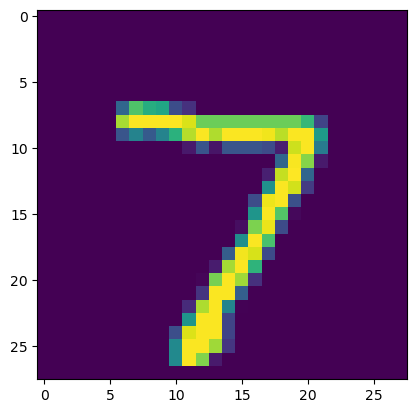

In [17]:
images_np[0].shape
plt.imshow(images_np[0])

# "Matrix multiplication"


In [18]:
torch.manual_seed(1)
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [19]:
m1 = images_np[:5].reshape(5, -1)
m1.shape

(5, 784)

In [20]:
torch.tensor(images_np[:5]).view(5, -1).shape


torch.Size([5, 784])

In [21]:
m2 = weights

m1.shape, m2.shape

((5, 784), torch.Size([784, 10]))

In [22]:
ar, ac = m1.shape
br, bc = m2.shape

(ar, ac), (br, bc)

((5, 784), (784, 10))

In [23]:
# resultant tensor

t1 = torch.zeros(ar, bc)
t1.shape

torch.Size([5, 10])

In [24]:
for i in range(ar): #5 each row one at aa time
    for j in range(bc): #10  each column one ata time
        for k in range(ac): # 784
            t1[i,j] += m1[i, k] * m2[k,j]

t1

tensor([[ -9.9532,  -3.8880,  -5.3230,   6.7895,  -5.3972,  -6.1437, -20.9652,
           0.1295,  -4.8179,   1.9989],
        [ -2.7911,  -5.1074,   2.5032,  -3.7225,  10.4510,  -5.7416,  -5.2013,
           0.5966, -22.2556,  18.8180],
        [  0.7113,  -3.2732,  -9.6388,   3.6244, -10.4286,  -2.6716, -12.8279,
           0.9658,   3.3336,  -1.5013],
        [  2.5451,  -1.3300,  -4.7280, -19.5480,  17.2274,  -2.3682, -20.7707,
         -11.7523, -37.0048,  13.2327],
        [ -8.1555,   0.4993,   1.6285, -11.3670,   8.5295,  -1.0342, -10.2872,
         -13.1507,   1.6778,   4.0687]])

In [25]:
def matmul(a,b):
    (ar,ac), (br,bc) = a.shape, b.shape
    c= torch.zeros(ar,bc)
    for i in range(ar): #5 each row one at aa time
        for j in range(bc): #10  each column one ata time
            for k in range(ac): # 784
                c[i,j] += a[i, k] * b[k,j]

    return c
%time matmul(m1,m2)

CPU times: user 323 ms, sys: 0 ns, total: 323 ms
Wall time: 323 ms


tensor([[ -9.9532,  -3.8880,  -5.3230,   6.7895,  -5.3972,  -6.1437, -20.9652,
           0.1295,  -4.8179,   1.9989],
        [ -2.7911,  -5.1074,   2.5032,  -3.7225,  10.4510,  -5.7416,  -5.2013,
           0.5966, -22.2556,  18.8180],
        [  0.7113,  -3.2732,  -9.6388,   3.6244, -10.4286,  -2.6716, -12.8279,
           0.9658,   3.3336,  -1.5013],
        [  2.5451,  -1.3300,  -4.7280, -19.5480,  17.2274,  -2.3682, -20.7707,
         -11.7523, -37.0048,  13.2327],
        [ -8.1555,   0.4993,   1.6285, -11.3670,   8.5295,  -1.0342, -10.2872,
         -13.1507,   1.6778,   4.0687]])

In [26]:
# numba tak python adn turns it into machime cpde
from numba import njit
import numpy as np

In [27]:
@njit
def dot(a,b):
    res = 0
    for i in range(len(a)): res+=a[i]*b[i]
    return res

In [28]:
%time dot(np.array([1. , 2., 3.]), np.array([1. , 2., 3.]))

CPU times: user 73.8 ms, sys: 0 ns, total: 73.8 ms
Wall time: 72.4 ms


14.0

In [29]:
%time dot(np.array([1. , 2., 3.]), np.array([1. , 2., 3.]))

CPU times: user 42 µs, sys: 0 ns, total: 42 µs
Wall time: 49.1 µs


14.0

In [38]:
%time dot(np.array([1. , 2., 3.,8., 99.]), np.array([1. , 2., 3.,99.,99.]))

CPU times: user 24 µs, sys: 5 µs, total: 29 µs
Wall time: 32.7 µs


10607.0

# first time it takes  to compile than it works at c's speed

now replicate that function

In [39]:
def matmul_njit(a,b):
    (ar,ac), (br,bc) = a.shape, b.shape
    c= torch.zeros(ar,bc)
    for i in range(ar): #5 each row one at aa time
        for j in range(bc): #10  each column one ata time
            c[i,j] = dot(a[i, :], b[:,j])

    return c
# matmul_njit(torch.tensor(m1),torch.tensor(m2))
matmul_njit(np.array(m1),np.array(m2))
    

tensor([[ -9.9532,  -3.8880,  -5.3230,   6.7895,  -5.3972,  -6.1437, -20.9652,
           0.1295,  -4.8179,   1.9989],
        [ -2.7911,  -5.1074,   2.5032,  -3.7225,  10.4510,  -5.7416,  -5.2013,
           0.5966, -22.2556,  18.8180],
        [  0.7113,  -3.2732,  -9.6388,   3.6244, -10.4286,  -2.6716, -12.8279,
           0.9658,   3.3336,  -1.5013],
        [  2.5451,  -1.3300,  -4.7280, -19.5480,  17.2274,  -2.3682, -20.7707,
         -11.7523, -37.0048,  13.2327],
        [ -8.1555,   0.4993,   1.6285, -11.3670,   8.5295,  -1.0342, -10.2872,
         -13.1507,   1.6778,   4.0687]])

In [68]:
%time matmul_njit(np.array(m1),np.array(m2))


CPU times: user 3.53 ms, sys: 0 ns, total: 3.53 ms
Wall time: 2.9 ms


tensor([[ -9.9532,  -3.8880,  -5.3230,   6.7895,  -5.3972,  -6.1437, -20.9652,
           0.1295,  -4.8179,   1.9989],
        [ -2.7911,  -5.1074,   2.5032,  -3.7225,  10.4510,  -5.7416,  -5.2013,
           0.5966, -22.2556,  18.8180],
        [  0.7113,  -3.2732,  -9.6388,   3.6244, -10.4286,  -2.6716, -12.8279,
           0.9658,   3.3336,  -1.5013],
        [  2.5451,  -1.3300,  -4.7280, -19.5480,  17.2274,  -2.3682, -20.7707,
         -11.7523, -37.0048,  13.2327],
        [ -8.1555,   0.4993,   1.6285, -11.3670,   8.5295,  -1.0342, -10.2872,
         -13.1507,   1.6778,   4.0687]])

In [69]:
%time matmul(np.array(m1),np.array(m2))


CPU times: user 381 ms, sys: 1.42 ms, total: 382 ms
Wall time: 381 ms


tensor([[ -9.9532,  -3.8880,  -5.3230,   6.7895,  -5.3972,  -6.1437, -20.9652,
           0.1295,  -4.8179,   1.9989],
        [ -2.7911,  -5.1074,   2.5032,  -3.7225,  10.4510,  -5.7416,  -5.2013,
           0.5966, -22.2556,  18.8180],
        [  0.7113,  -3.2732,  -9.6388,   3.6244, -10.4286,  -2.6716, -12.8279,
           0.9658,   3.3336,  -1.5013],
        [  2.5451,  -1.3300,  -4.7280, -19.5480,  17.2274,  -2.3682, -20.7707,
         -11.7523, -37.0048,  13.2327],
        [ -8.1555,   0.4993,   1.6285, -11.3670,   8.5295,  -1.0342, -10.2872,
         -13.1507,   1.6778,   4.0687]])

# elementwise operation
